# Process Parameter Optimization

In [1]:
# ! pip install -r requirements.txt

## Libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [3]:
from utils.data_fetch import read_data
data = read_data()

C:\Users\Vardan\AppData\Local\Temp\ipykernel_6232\1164869249.py:2: DeprecationWarning: [Deprecated][in version 6.0.0]: client_factory will be replaced by gspread.http_client types
  data = read_data()


TransportError: HTTPSConnectionPool(host='oauth2.googleapis.com', port=443): Max retries exceeded with url: /token (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x000001C6EA80C290>: Failed to resolve 'oauth2.googleapis.com' ([Errno 11001] getaddrinfo failed)"))

## Data Analysis

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Spindle Speed             108 non-null    object
 1   Feed (mm/min)             108 non-null    object
 2   Tool Dia. (mm)            108 non-null    object
 3   Depth of Cut (mm)         108 non-null    object
 4   Length of Cut (mm)        108 non-null    object
 5   Length of cut actual(mm)  108 non-null    object
 6   Width of Cut(mm)          108 non-null    object
 7   Actual Width(mm)          108 non-null    object
 8   Wi                        108 non-null    object
 9   Wf                        108 non-null    object
 10  delta Weight              108 non-null    object
 11  Time (sec)                108 non-null    object
 12  Time (min)                108 non-null    object
 13  MRR ideal                 108 non-null    object
 14  MRR actual                

In [ ]:
data = data.drop(["Density(g/mm3)", "Time (min)", "Time (sec)", "Depth of Cut (mm)", "Length of Cut (mm)","Length of cut actual(mm)", "Width of Cut(mm)", "Actual Width(mm)" ], axis=1)
data = data.astype("float")

In [ ]:
data.head()

,Spindle Speed,Feed (mm/min),Tool Dia. (mm),Wi,Wf,delta Weight,MRR ideal,MRR actual,Delta L,Delta W
0,3000.0,10.0,1.0,49.3753,49.3694,0.0059,3.0,1.076451,0.0480,0.18700
1,3000.0,15.0,1.0,49.3694,49.3682,0.0012,4.5,0.327195,0.0640,0.00200
2,3000.0,20.0,1.0,49.3682,49.3659,0.0023,6.0,0.806629,0.0500,0.14500
3,3250.0,10.0,1.0,49.3659,49.3635,0.0024,3.0,1.007537,0.0565,0.14425
4,3250.0,15.0,1.0,49.3635,49.3617,0.0018,4.5,0.553689,0.0605,0.08075


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Spindle Speed   108 non-null    float64
 1   Feed (mm/min)   108 non-null    float64
 2   Tool Dia. (mm)  108 non-null    float64
 3   Wi              108 non-null    float64
 4   Wf              108 non-null    float64
 5   delta Weight    108 non-null    float64
 6   MRR ideal       108 non-null    float64
 7   MRR actual      108 non-null    float64
 8   Delta L         108 non-null    float64
 9   Delta W         108 non-null    float64
dtypes: float64(10)
memory usage: 8.6 KB


array([[<Axes: title={'center': 'Spindle Speed'}>,
        <Axes: title={'center': 'Feed (mm/min)'}>,
        <Axes: title={'center': 'Tool Dia. (mm)'}>],
       [<Axes: title={'center': 'Wi'}>, <Axes: title={'center': 'Wf'}>,
        <Axes: title={'center': 'delta Weight'}>],
       [<Axes: title={'center': 'MRR ideal'}>,
        <Axes: title={'center': 'MRR actual'}>,
        <Axes: title={'center': 'Delta L'}>],
       [<Axes: title={'center': 'Delta W'}>, <Axes: >, <Axes: >]],
      dtype=object)

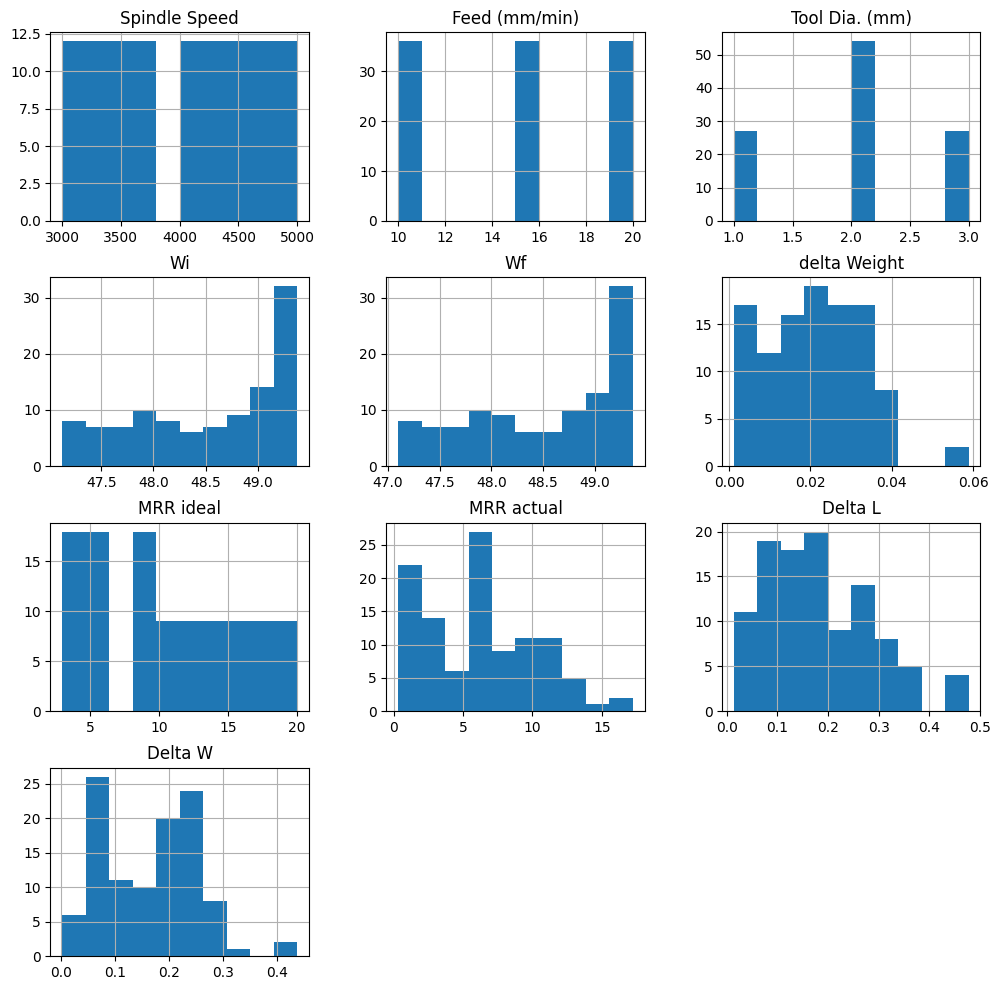

In [ ]:
data.hist(figsize=(12,12))

In [ ]:
data.corr()["Spindle Speed"].sort_values()

Wi               -2.316687e-01
Wf               -2.288657e-01
delta Weight     -5.537949e-03
Tool Dia. (mm)   -2.481599e-16
MRR ideal        -1.984575e-16
Feed (mm/min)    -1.086517e-16
MRR actual        9.541056e-02
Delta W           1.562890e-01
Delta L           2.144670e-01
Spindle Speed     1.000000e+00
Name: Spindle Speed, dtype: float64

In [ ]:
data.corr()["Feed (mm/min)"].sort_values()

Delta L          -9.533012e-02
delta Weight     -5.602127e-02
Wi               -2.463229e-02
Wf               -2.341556e-02
Delta W          -1.963717e-02
Spindle Speed    -1.086517e-16
Tool Dia. (mm)   -3.840069e-17
MRR actual        3.685047e-01
MRR ideal         5.573312e-01
Feed (mm/min)     1.000000e+00
Name: Feed (mm/min), dtype: float64

array([[<Axes: xlabel='Delta W', ylabel='Feed (mm/min)'>,
        <Axes: xlabel='Delta L', ylabel='Feed (mm/min)'>,
        <Axes: xlabel='Feed (mm/min)', ylabel='Feed (mm/min)'>,
        <Axes: xlabel='Spindle Speed', ylabel='Feed (mm/min)'>],
       [<Axes: xlabel='Delta W', ylabel='Spindle Speed'>,
        <Axes: xlabel='Delta L', ylabel='Spindle Speed'>,
        <Axes: xlabel='Feed (mm/min)', ylabel='Spindle Speed'>,
        <Axes: xlabel='Spindle Speed', ylabel='Spindle Speed'>]],
      dtype=object)

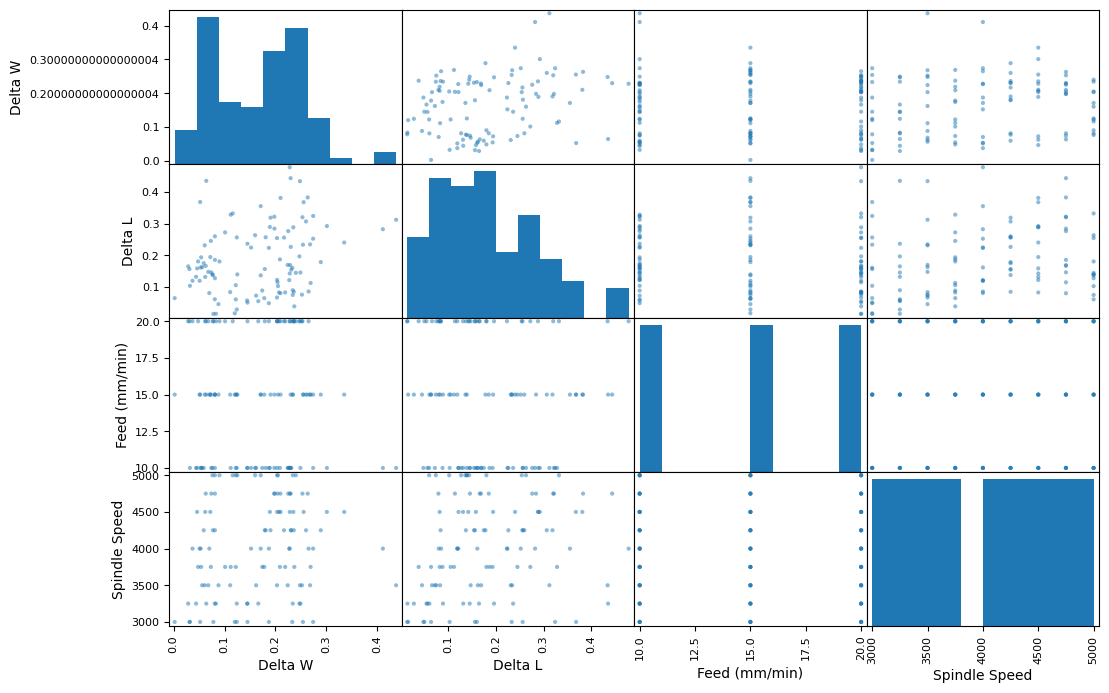

In [ ]:
from pandas.plotting import scatter_matrix
attributes=["Delta W", "Delta L", "Feed (mm/min)", "Spindle Speed"]
scatter_matrix(data[attributes], figsize=(12, 8))[2:]

## Data Preprocessing

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
train_set, test_set = train_test_split(data, test_size=0.2, random_state=32)

In [ ]:
X_train = train_set.drop(["Spindle Speed", "Feed (mm/min)"], axis = 1)
y_train=pd.concat([train_set["Spindle Speed"], train_set["Feed (mm/min)"]], axis=1)

In [ ]:
features_name = X_train.columns
target_name = y_train.columns

## Model Selection

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rnd_reg = RandomForestRegressor(n_estimators=500, max_leaf_nodes=20, n_jobs=-1, max_depth=10)
rf_pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("Random Forest", rnd_reg)
])

rf_model = rf_pipeline.fit(X_train, y_train)

In [ ]:
rf_model.predict([[2.0,47.7829,47.7544,0.0285,20.0,10.292861,0.1645,0.02850]])

f:\Projects\Micromilling_process_optimisation\.venv\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[3263.31589775,   16.18082966]])

In [ ]:
estimator = rf_model.named_steps["Random Forest"].estimators_[0]

In [ ]:
from utils.Visualizations import rf_visualize
rf_visualize(estimator, features_name,target_name)

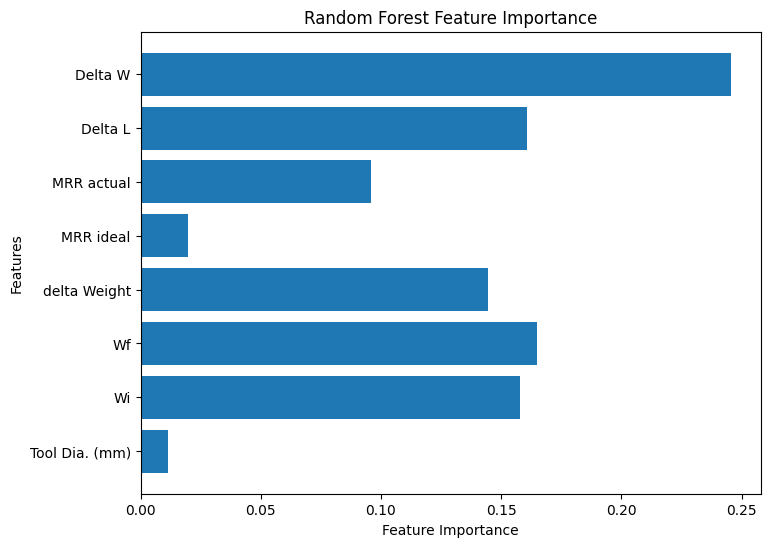

In [ ]:
importances = rf_model.named_steps['Random Forest'].feature_importances_
plt.figure(figsize=(8, 6))
plt.barh(features_name, importances)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Random Forest Feature Importance')
plt.show()

## Performance Testing

In [ ]:
from utils.performace_checking import Performance_testing
Performance_testing(rf_model, X_train,y_train, 10)

Scores: [285.21635857 269.80091658 385.91030287 235.05950157 368.62225122
 497.59197148 265.32672369 288.5823403  289.31290969 251.22786925]
Mean: 313.66511452242105
Standard deviation: 76.44486239000439


## Model Optimization

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
random_grid = {
    "rnd_reg1__bootstrap":[True],
    "rnd_reg1__n_estimators":[50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600],
    "rnd_reg1__max_depth":[10, 20, 30, 40],
    "rnd_reg1__max_features":["auto","sqrt"],
    "rnd_reg1__min_samples_leaf":[1, 2, 3, 4],
    "rnd_reg1__min_samples_split":[2, 5, 7, 10, 13, 15, 17,20],
}

rnd_pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("rnd_reg1", RandomForestRegressor())
])
rnd_search = RandomizedSearchCV(rnd_pipeline, param_distributions=random_grid,cv=10,n_jobs=-1,random_state=42)


In [ ]:
rnd_search.fit(X_train,y_train)

f:\Projects\Micromilling_process_optimisation\.venv\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
50 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
29 fits failed with the following error:
Traceback (most recent call last):
  File "f:\Projects\Micromilling_process_optimisation\.venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "f:\Projects\Micromilling_process_optimisation\.venv\Lib\site-packages\sklearn\base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "f:\Projects\Micromilling_proc

RandomizedSearchCV(cv=10,
                   estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                             ('rnd_reg1',
                                              RandomForestRegressor())]),
                   n_jobs=-1,
                   param_distributions={'rnd_reg1__bootstrap': [True],
                                        'rnd_reg1__max_depth': [10, 20, 30, 40],
                                        'rnd_reg1__max_features': ['auto',
                                                                   'sqrt'],
                                        'rnd_reg1__min_samples_leaf': [1, 2, 3,
                                                                       4],
                                        'rnd_reg1__min_samples_split': [2, 5, 7,
                                                                        10, 13,
                                                                        15, 17,
                                                                        20],
                                        'rnd_reg1__n_estimators': [50, 100, 150,
                                                                   200, 250,
                                                                   300, 350,
                                                                   400, 450,
                                                                   500, 550,
                                                                   600]},
                   random_state=42)

In [ ]:
rnd_search.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('rnd_reg1',
                 RandomForestRegressor(max_depth=20, max_features='sqrt',
                                       min_samples_leaf=2, min_samples_split=10,
                                       n_estimators=550))])

In [ ]:
rnd_search.best_params_

{'rnd_reg1__n_estimators': 550,
 'rnd_reg1__min_samples_split': 10,
 'rnd_reg1__min_samples_leaf': 2,
 'rnd_reg1__max_features': 'sqrt',
 'rnd_reg1__max_depth': 20,
 'rnd_reg1__bootstrap': True}

In [ ]:
from utils.model_testing import test_score
test_score(rnd_search, X_train,y_train)

The mean square error is 222.24162760651168 and the r2 score is 0.5412813798409599.


In [ ]:
final_pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("rnd_reg1", RandomForestRegressor())
])

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    "rnd_reg1__bootstrap": [True],
    "rnd_reg1__max_depth": [40, 45, 50, 55],
    "rnd_reg1__min_samples_leaf": [1,2],
    "rnd_reg1__min_samples_split": [11,12,13,14,15],
    "rnd_reg1__n_estimators": [500, 510, 520, 530, 540, 550],
    "rnd_reg1__max_features":["sqrt"]
}

grid_search = GridSearchCV(estimator=final_pipeline,param_grid=param_grid,cv=10,n_jobs=-1)

In [ ]:
grid_search.fit(X_train,y_train)

In [ ]:
grid_search.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('rnd_reg1',
                 RandomForestRegressor(max_depth=20, max_features='sqrt',
                                       min_samples_split=11,
                                       n_estimators=500))])

In [ ]:
grid_search.best_params_

{'rnd_reg1__bootstrap': True,
 'rnd_reg1__max_depth': 20,
 'rnd_reg1__max_features': 'sqrt',
 'rnd_reg1__min_samples_leaf': 1,
 'rnd_reg1__min_samples_split': 11,
 'rnd_reg1__n_estimators': 500}

In [ ]:
final_rf_model = grid_search.best_estimator_

In [ ]:
Performance_testing(final_rf_model,X_train,y_train,10)

Scores: [312.11531124 310.7496989  417.98316482 328.7396429  361.36461232
 476.70679625 334.93194928 366.71573974 271.31146937 341.44679566]
Mean: 352.20651804865054
Standard deviation: 55.638235895974674


In [ ]:
import joblib
joblib.dump(final_rf_model,"Random_Forest_Model.pkl")

['Random_Forest_Model.pkl']

In [ ]:
model = joblib.load("Random_Forest_Model.pkl")

## Models Testing

In [ ]:
X_test = test_set.drop(["Spindle Speed", "Feed (mm/min)"], axis = 1)
y_test=pd.concat([test_set["Spindle Speed"], test_set["Feed (mm/min)"]], axis=1)

In [ ]:
from utils.model_testing import test_score
test_score(model, X_test, y_test)

The mean square error is 375.3261393138485 and the r2 score is 0.2829894701655149.


In [ ]:
test_score(model, X_train,y_train)

The mean square error is 225.11356468100556 and the r2 score is 0.5258374539206904.
